## Import data

In [101]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


## Helper function for calculating survival rate

In [102]:
def getRate(group):
    """
    Given a group of passengers, return the survival rate
    """
    if len(group):
        return sum(group.Survived) / float(len(group))
    else:
        return 0.0

## Looking at individual features

In [103]:
males = df[df.Sex == 'male']
females = df[df.Sex == 'female']

print 'Survival Rates by Gender:'
print 'Males ({}):\t'.format(len(males)), getRate(males)
print 'Females ({}):\t'.format(len(females)), getRate(females)

Survival Rates by Gender:
Males (577):	0.188908145581
Females (314):	0.742038216561


I was shocked to see that males had a survival rate of 0.19 while females had a survival rate of 0.74.  I was expecting females to have a higher survival rate because of the saying 'women and children first,' but not by this much.

In [104]:
upper = df[df.Pclass == 1]
middle = df[df.Pclass == 2]
lower = df[df.Pclass == 3]

print 'Survival Rates by Passenger Class:'
print 'Upper ({}):\t'.format(len(upper)), getRate(upper)
print 'Middle ({}):\t'.format(len(middle)), getRate(middle)
print 'Lower ({}):\t'.format(len(lower)), getRate(lower)

Survival Rates by Passenger Class:
Upper (216):	0.62962962963
Middle (184):	0.472826086957
Lower (491):	0.242362525458


Upper class passengers had a survival rate of 0.63, middle class passengers had a survival rate of 0.47, and lower class passengers had a survival rate of 0.24.  This is not very surprising since I would guess that the upper class passengers would have cabins located higher up on the ship.  It is also possible that they were given preferential treatment in the evacuation process.

In [105]:
unknown = df[df.Age.isnull()]
infants = df[df.Age <= 2]
children = df[(df.Age > 2) & (df.Age < 18)]
adults = df[df.Age >= 18]

print 'Survival Rates by Age:'
print 'Unknown ({}):\t'.format(len(unknown)), getRate(unknown)
print 'Infants ({}):\t'.format(len(infants)), getRate(infants)
print 'Children ({}):\t'.format(len(children)), getRate(children)
print 'Adults ({}):\t'.format(len(adults)), getRate(adults)

Survival Rates by Age:
Unknown (177):	0.293785310734
Infants (24):	0.625
Children (89):	0.516853932584
Adults (601):	0.381031613977


Unlike with the previous categories, there were some passengers of unknown age.  They had a survival rate of 0.29, infants (less than two years old) had a survival rate of 0.63, children (two to 18 years old) had a survival rate of 0.52, and adults (18 years or older) had a survival rate of 0.38.  The higher survival rate in infants and children is unsurprising for the same reason as the higher survival rate in females.

In [106]:
unknown = df[df.Embarked.isnull()]
cherbourg = df[df.Embarked == 'C']
queenstown = df[df.Embarked == 'Q']
southampton = df[df.Embarked == 'S']

print 'Survival Rates by Port of Embarkation:'
print 'Unknown ({}):\t\t'.format(len(unknown)), getRate(unknown)
print 'Cherbourg ({}):\t'.format(len(cherbourg)), getRate(cherbourg)
print 'Queenstown ({}):\t'.format(len(queenstown)), getRate(queenstown)
print 'Southampton ({}):\t'.format(len(southampton)), getRate(southampton)


Survival Rates by Port of Embarkation:
Unknown (2):		1.0
Cherbourg (168):	0.553571428571
Queenstown (77):	0.38961038961
Southampton (644):	0.336956521739


I was not expecting the port of embarkation to have much of an effect on survival rate, but it does look like those who boarded in Cherbourg had a higher survival rate (0.55) than those who boarded in Queenstown or Southampton (0.39 and 0.34, respectively).  My guess is that Cherbourg had a higher percentage of women, children, or upper class passengers than the other locations.

## Looking at combinations of features

In [107]:
upper_males = df[(df.Pclass == 1) & (df.Sex == 'male')]
upper_females = df[(df.Pclass == 1) & (df.Sex == 'female')]
middle_males = df[(df.Pclass == 2) & (df.Sex == 'male')]
middle_females = df[(df.Pclass == 2) & (df.Sex == 'female')]
lower_males = df[(df.Pclass == 3) & (df.Sex == 'male')]
lower_females = df[(df.Pclass == 3) & (df.Sex == 'female')]

print 'Survival Rates by Passenger Class and Gender:'
print 'Upper Males ({}):\t'.format(len(upper_males)), getRate(upper_males)
print 'Upper Females ({}):\t'.format(len(upper_females)), getRate(upper_females)
print 'Middle Males ({}):\t'.format(len(middle_males)), getRate(middle_males)
print 'Middle Females ({}):\t'.format(len(middle_females)), getRate(middle_females)
print 'Lower Males ({}):\t'.format(len(lower_males)), getRate(lower_males)
print 'Lower Females ({}):\t'.format(len(lower_females)), getRate(lower_females)

Survival Rates by Passenger Class and Gender:
Upper Males (122):	0.368852459016
Upper Females (94):	0.968085106383
Middle Males (108):	0.157407407407
Middle Females (76):	0.921052631579
Lower Males (347):	0.135446685879
Lower Females (144):	0.5


This makes sense; within a passenger class, the females had the higher rate of survival, and within a gender, the upper class had the highest rate of survival.  It is a little surprising to me how drastic the difference is between the classes.  Upper and middle class females had survival rates of over 0.92 while lower class females had a survival rate of only 0.50.  For males, the middle class swung the other way.  Upper class males had a survival rate of 0.37 while middle and lower class males had survival rates of less than 0.16.  In both cases, one or two groups had approximately double the survival rate of the other(s), but the middle class was not consistent between male and female as to which category it was in.

In [108]:
infant_males = df[(df.Age <= 2) & (df.Sex == 'male')]
infant_females = df[(df.Age <= 2) & (df.Sex == 'female')]
child_males = df[(df.Age > 2) & (df.Age < 18) & (df.Sex == 'male')]
child_females = df[(df.Age > 2) & (df.Age < 18) & (df.Sex == 'female')]
adult_males = df[(df.Age >= 18) & (df.Sex == 'male')]
adult_females = df[(df.Age >= 18) & (df.Sex == 'female')]

print 'Survival Rates by Age and Gender:'
print 'Infant Males ({}):\t'.format(len(infant_males)), getRate(infant_males)
print 'Infant Females ({}):\t'.format(len(infant_females)), getRate(infant_females)
print 'Child Males ({}):\t'.format(len(child_males)), getRate(child_males)
print 'Child Females ({}):\t'.format(len(child_females)), getRate(child_females)
print 'Adult Males ({}):\t'.format(len(adult_males)), getRate(adult_males)
print 'Adult Females ({}):\t'.format(len(adult_females)), getRate(adult_females)

Survival Rates by Age and Gender:
Infant Males (14):	0.642857142857
Infant Females (10):	0.6
Child Males (44):	0.318181818182
Child Females (45):	0.711111111111
Adult Males (395):	0.177215189873
Adult Females (206):	0.771844660194


There are a couple of surprises here.  Adult females had a greater survival rate than child females, but not by a huge amount, and both were quite high.  Child males had a higher survival rate than adult males but a lower survival rate than child females, but infant males had a higher survival rate than infant females.  Recalling the 'women and children first' saying, it makes sense that infants had around the same survival rate regardless of gender. However, it seems like the definition of 'children' might have had a lower upper bound than the age of 18 (which was how I was classifying children).

## Visualizing a relationship with a continuous feature

In [109]:
def plotSurvivalByAge(df_group, bin_step=1, new_fig=True):
    """
    Given a group of passengers and bin size, plot the survival rate as a function of age.
    """
    bins = np.arange(0, 80, bin_step)
    indices = np.digitize(df_group.Age, bins)
    groups = df_group.groupby(indices)

    ages = [group.Age.mean() for i, group in groups]
    rates = [getRate(group) for i, group in groups]

    if new_fig:
        plt.figure()
    plt.plot(ages, rates)
    plt.xlabel('Age (years)')
    plt.ylabel('Survival Rate')
    plt.axis([0, 80, 0, 1])

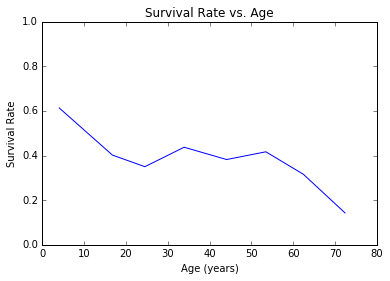

In [110]:
# Only use passengers with known or estimated age
# Since estimates are coded as xx.5, it will affect things slightly, 
# but we should still get the general idea due to binning
df = df[df.Age.notnull()]

plotSurvivalByAge(df, 10)
plt.title('Survival Rate vs. Age')

These results are not surprising; survival rate decreases as age increases.  I am interested in seeing the difference between genders and zooming in more on the younger end of the spectrum with less aggressive binning.

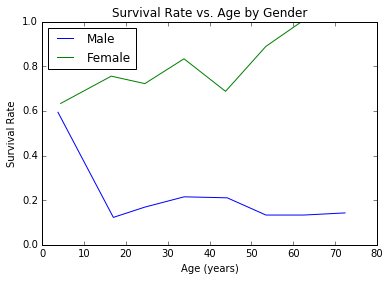

In [111]:
males = df[df.Sex == 'male']
females = df[df.Sex == 'female']

plotSurvivalByAge(males, 10)
plotSurvivalByAge(females, 10, False)
plt.legend(['Male', 'Female'], loc=0)
plt.title('Survival Rate vs. Age by Gender')

Given what we've seen before, this is not surprising either.  Young children has similar survival rates regardless of gender, men in their teens and older has low survival rates, and women in general had higher survival rates.

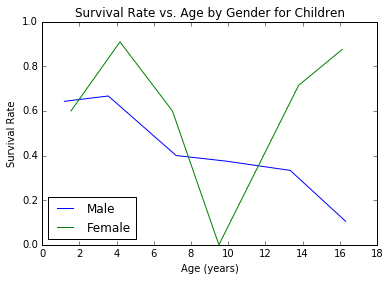

In [112]:
child_males = males[males.Age < 18]
child_females = females[females.Age < 18]

plotSurvivalByAge(child_males, 3)
plotSurvivalByAge(child_females, 3, False)
plt.legend(['Male', 'Female'], loc=0)
plt.axis([0, 18, 0, 1])
plt.title('Survival Rate vs. Age by Gender for Children')

It is interesting that the survival rate for male children has a downward trend as age increases, but the survival rate for female children varies more.  My initial thought is that the fourth bin of female children (with a survival rate of 0.0) might have zero or only one person in it.  Let's check.

In [113]:
bins = np.arange(0, 80, 3)
indices = np.digitize(child_females.Age, bins)
groups = child_females.groupby(indices)
print [len(group) for i, group in groups]
print [(group.Age.min(), group.Age.max()) for i, group in groups]

[10, 11, 5, 6, 7, 16]
[(0.75, 2.0), (3.0, 5.0), (6.0, 8.0), (9.0, 11.0), (13.0, 14.5), (15.0, 17.0)]


It turns out that the fourth bin had six passengers in it, so the 0.0 survival rate means that all six of the female children between 9 and 11 years of age did not survive the incident.  From a statistical significance standpoint, six is not a very large number, but it is still surprising to me that there was a group of female children with a survival rate of 0.0 given the trends previously observed.